In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 #to install it -> !pip install opencv-python
from tensorflow import keras
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models
from pathlib import Path
from tensorflow.keras.optimizers import SGD
import math

In [2]:
K.clear_session()
print("Loading the model..")
model = load_model('../models/best_model_45class.hdf5',compile = False)
print("Done!")

Loading the model..
Done!


Using TensorFlow backend.


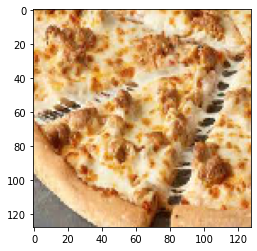

Predicted: [[3.0350010e-04 1.2937099e-03 7.1925222e-04 2.2095184e-04 8.9455090e-02
  7.2578609e-05 8.4018841e-04 3.9690835e-03 1.5517227e-04 2.4249114e-04
  5.6620932e-04 7.4613251e-04 2.8713923e-03 2.8614611e-03 2.7548518e-05
  2.9807854e-03 1.0145727e-04 6.3287828e-04 9.0121096e-03 2.4387000e-02
  2.0262362e-04 3.8625323e-04 5.3004804e-03 5.5910069e-03 5.5721554e-04
  2.9300046e-04 5.6707370e-03 4.3461283e-04 7.0404494e-04 7.9849422e-01
  5.9685734e-04 1.3757823e-04 4.7506808e-04 1.9041174e-03 1.5638827e-03
  1.9310949e-04 1.3290778e-04 8.7868830e-04 2.1732589e-03 2.2687657e-02
  7.6178600e-05 1.5547639e-04 1.5227840e-03 6.8605421e-03 1.5487600e-03]]
Pizza


In [3]:
from keras.preprocessing.image import img_to_array, array_to_img

clases = ['Beef tartare',
'Breakfast burrito',
'Ceviche',
'Chicken curry',
'Chicken quesadilla',
'Chicken wings',
'Club sandwich',
'Dumplings',
'Edamame',
'Falafel',
'French fries',
'Fried calamari',
'Fried rice',
'Grilled cheese sandwich',
'Guacamole',
'Gyoza',
'Hamburger',
'Hot dog',
'Hummus',
'Lasagna',
'Miso soup',
'Mussels',
'Nachos',
'Omelette',
'Onion rings',
'Oysters',
'Pad thai',
'Paella',
'Panna cotta',
'Pizza',
'Pork chop',
'Prime rib',
'Ramen',
'Ravioli',
'Risotto',
'Samosa',
'Sashimi',
'Scallops',
'Spaghetti bolognese',
'Spaghetti carbonara',
'Spring rolls',
'Steak',
'Sushi',
'Tacos',
'Tuna tartare']

img_path = '../pizzaa.jpeg'
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.
plt.imshow(x[0])
plt.show()

predicted = model.predict(x)
print('Predicted:', predicted)

max_position = np.where(predicted==predicted.max())[1][0]
print(clases[max_position])

In [4]:
plates= ['Beef tartare',
'Breakfast burrito',
'Ceviche',
'Chicken curry',
'Chicken quesadilla',
'Chicken wings',
'Club sandwich',
'Dumplings',
'Edamame',
'Falafel',
'French fries',
'Fried calamari',
'Fried rice',
'Grilled cheese sandwich',
'Guacamole',
'Gyoza',
'Hamburger',
'Hot dog',
'Hummus',
'Lasagna',
'Miso soup',
'Mussels',
'Nachos',
'Omelette',
'Onion rings',
'Oysters',
'Pad thai',
'Paella',
'Panna cotta',
'Pizza',
'Pork chop',
'Prime rib',
'Ramen',
'Ravioli',
'Risotto',
'Samosa',
'Sashimi',
'Scallops',
'Spaghetti bolognese',
'Spaghetti carbonara',
'Spring rolls',
'Steak',
'Sushi',
'Tacos',
'Tuna tartare']


def predict_plates(images, show = True):
    global food_choices_plate
    food_choices_plate= []
    model = load_model('../models/best_model_45class.hdf5',compile = False)
    for img in images:
        img = image.load_img(img, target_size=(128, 128))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        plates.sort()
        pred_value = plates[index].lower()
        food_choices_plate.append(pred_value)
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

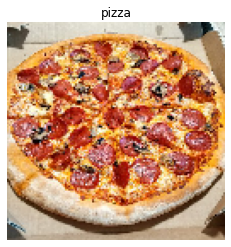

In [5]:
predict_plates(['../lala.jpg'])

In [6]:
deserts = ['Apple pie',
'Cannoli',
'Carrot cake',
'Cheesecake',
'Chocolate cake',
'Chocolate mousse',
'Ice cream',
'Strawberry shortcake',
'Tiramisu']


def predict_deserts(images, show = True):
    global food_choices_desert
    food_choices_desert = []
    model = load_model('../models/best_model_9desert.hdf5',compile = False)
    for img in images:
        img = image.load_img(img, target_size=(128, 128))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        deserts.sort()
        pred_value = deserts[index].lower()
        food_choices_desert.append(pred_value)
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

In [7]:
salads = ['Beet salad',
'Caesar salad',
'Caprese salad',
'Greek salad',
'Seaweed salad']


def predict_salads(images, show = True):
    global food_choices_salad
    food_choices_salad = []
    model = load_model('../models/best_model_salads.hdf5',compile = False)
    for img in images:
        img = image.load_img(img, target_size=(128, 128))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        salads.sort()
        pred_value = salads[index].lower()
        food_choices_salad.append(pred_value)
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

    

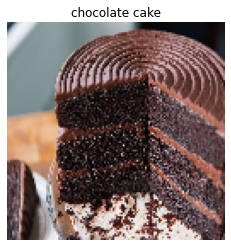

In [8]:
predict_deserts(['../chocolate_cake.jpeg'])

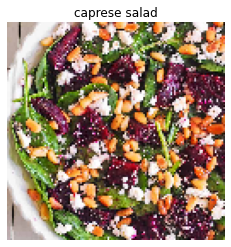

['caprese salad']


In [9]:
predict_salads(['../beet-salad-with-goat-cheese-3.jpg'])
print(food_choices_salad)

# User Choices - CALCULATION

In [10]:
df = pd.read_csv('restaurant_dataframe.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,product,price,type,rating,cuisine,restaurant,lat,log
0,misto tagliatella,15.30,plato,8.7,italiano,la tagliatella - fuencarral,40.431090,-3.703470
1,cannelloni,13.85,plato,8.7,italiano,la tagliatella - fuencarral,40.431090,-3.703470
2,copa de champán,11.00,bebida,9,americano,la gamella,40.418802,-3.688900
3,café,2.10,bebida,9,americano,la gamella,40.418802,-3.688900
4,media botella de agua,3.00,bebida,9,americano,la gamella,40.418802,-3.688900
...,...,...,...,...,...,...,...,...
15633,yakibifun apto para celíacos,11.25,plato,8.7,japonés,janatomo,40.420045,-3.698975
15634,pollo crocante,9.00,ensalada,8.7,mediterráneo,monss,40.520155,-3.777851
15635,fabes de tineo con su compango,17.82,plato,9.1,asturiano,teitu,40.457087,-3.692160
15636,rape estilo lastres,17.82,plato,9.1,asturiano,teitu,40.457087,-3.692160


In [11]:
for i in df['product']:
    if 'lasagna' in i:
        print(i)

lasagna de verduras
lasagna all’ emiliana
lasagna di carne
lasagna
lasagna
1. lasagna di carne (pasta con boloñesa, mozzarella, parmesano y bechamel)
lasagna di carne
lasagna di verdure
lasagna
lasagna bolognesa
lasagna de langostinos tigre, verduritas y setas con ali oli de albahaca


In [12]:
def translate_food_names(food_list, food_dict):
    return [food_dict.get(e,'') for e in food_list]

### Plate Choices

In [13]:
plate_dict = {'beef tartare': 'tartar de carne',
'breakfast burrito': 'burrito',
'ceviche': 'ceviche',
'chicken curry': 'curry',
'chicken quesadilla': 'quesadilla de pollo',
'chicken wings': 'alitas de pollo',
'club sandwich': 'sandwich',
'dumplings': 'empanadillas',
'edamame': 'edamame',
'falafel': 'falafel',
'french fries': 'patatas fritas',
'fried calamari': 'calamares',
'fried rice': 'arroz frito',
'grilled cheese sandwich': 'sandwich de queso',
'guacamole': 'guacamole',
'gyoza': 'gyoza',
'hamburger': 'hamburguesa',
'hot dog': 'hot dog',
'hummus': 'hummus',
'lasagna': 'lasaña',
'miso soup': 'sopa miso',
'mussels': 'mejillones',
'nachos': 'nachos',
'omelette': 'tortilla',
'onion rings': 'aros de cebolla',
'oysters': 'ostras',
'pad thai': 'pad thai',
'paella': 'paella',
'panna cotta': 'panna cotta',
'pizza': 'pizza',
'pork chop': 'chuleta',
'prime rib': 'costilla',
'ramen': 'ramen',
'ravioli': 'ravioli',
'risotto': 'risotto',
'samosa': 'samosa',
'sashimi': 'sashimi',
'scallops': 'vieira',
'spaghetti bolognese': 'espagueti a la boloñesa',
'spaghetti carbonara': 'espagueti carbonara',
'spring rolls': 'rollitos primavera',
'steak' : 'carne',
'sushi': 'sushi',
'tacos': 'tacos',
'tuna tartare': 'tarta de atun'}

In [14]:
plate_choices = translate_food_names(food_choices_plate, plate_dict)
plate_choices

['pizza']

### Desert Choices

In [15]:
desert_dict = {'apple pie': 'tarta de manzana',
'cannoli': 'cannoli',
'carrot cake': 'tarta de zanahoria',
'cheesecake': 'cheesecake',
'chocolate cake': 'tarta de chocolate',
'chocolate mousse': 'mouse de chocolate',
'ice cream': 'helado',
'strawberry shortcake': 'tarta de fresa',
'tiramisu': 'tiramisú'}

In [16]:
desert_choices = translate_food_names(food_choices_desert, desert_dict)
desert_choices

['tarta de chocolate']

### Total Choices - Calculation

In [3]:
starter_choices = ['jamón']

In [4]:
total_choices = starter_choices + ['espagueti carbonara', 'tarta de zanahoria', 'copa de vino']
total_choices

['jamón', 'sashimi', 'tarta de zanahoria', 'copa de vino']

In [5]:
total_choices[1:]

['sashimi', 'tarta de zanahoria', 'copa de vino']

In [2]:
df_initial = pd.read_csv('../data/restaurant_dataframe.csv')
df_initial

,Unnamed: 0,product,price,type,rating,cuisine,restaurant,lat,log
0,0,misto tagliatella,15.30,plato,8.7,italiano,la tagliatella - fuencarral,40.431090,-3.703470
1,1,cannelloni,13.85,plato,8.7,italiano,la tagliatella - fuencarral,40.431090,-3.703470
2,3,copa de champan,11.00,bebida,9,americano,la gamella,40.418802,-3.688900
3,4,cafe,2.10,bebida,9,americano,la gamella,40.418802,-3.688900
4,6,media botella de agua,3.00,bebida,9,americano,la gamella,40.418802,-3.688900
...,...,...,...,...,...,...,...,...,...
21473,27164,yakibifun apto para celiacos,11.25,plato,8.7,japones,janatomo,40.420045,-3.698975
21474,27165,pollo crocante,9.00,plato,8.7,mediterraneo,monss,40.520155,-3.777851
21475,27175,fabes de tineo con su compango,17.82,plato,9.1,asturiano,teitu,40.457087,-3.692160
21476,27176,rape estilo lastres,17.82,plato,9.1,asturiano,teitu,40.457087,-3.692160


In [15]:
starter_guay = ['jamon']
prices_df = pd.DataFrame()
df_starter_choice = pd.DataFrame()
df_starter = df_initial.loc[df_initial['type'].str.contains('entrante'),:]
if starter_guay[0] not in df_starter.loc[df_starter['product'].str.contains(starter_guay[0]),:]:
    print('dont')

dont


In [22]:
df_starter.loc[df_starter['product'].str.contains('aaaa'),:].empty

True

In [5]:
for i in df_starter['product']:
    if 'jamon' in i:
        print(i)

jamon y queso
ensalada improvisada del chef con jamon de pato
huevos rotos con jamon
jamon iberico de bellota
salmorejo, con jamon y huevo duro
croquetas caseras de pollo o jamon (6 uds.)
tres empanadillas argentinas rellenas de carne, pollo o jamon y queso
el jamon, el pan y el tomate
croquetas de jamon y setas, chips de yuca, paprika
jamon iberico de bellota con pan tumaca
alcachofitas de tudela con gambas y crujiente de jamon
croquetas caseras de jamon y boletus (8 unidades)
croquetas de jamon ahumado
croquetas caseras de jamon iberico
alcachofas a la plancha con polvo de jamon y salsa de aceitunas negras
huevos rotos con jamon iberico
flamenquin de pluma iberica relleno de jamon iberico, huevo y queso payoyo trufado con patatas fritas
alcachofas confitadas en aceite de oliva con brandada de bacalao, torreznos de su piel y lascas de jamon
croquetas caseras de queso con nueces, boletus o jamon (unidad)
quesadilla de jamon y queso
huevos de corral con boletus y jamon iberico
croqueta 

In [169]:
df_initial = pd.read_csv('../restaurant_dataframe.csv')
df_initial = df_initial.drop('Unnamed: 0', axis=1)

prices_df = pd.DataFrame()
prices_df_product = pd.DataFrame()

if starter_choices != ['']:
    df_starter = df_initial.loc[df_initial['type'].str.contains('entrante'),:]
    df_starter_choice = df_starter.loc[df_starter['product'].str.contains(starter_choices[0]),:]
    prices_df[f'price_{starter_choices[0]}'] = df_starter_choice.groupby('restaurant')['price'].min()
    prices_df.reset_index(inplace=True)
        
    for choice in total_choices[1:]:
        df_product = df_initial.loc[df_initial['product'].str.contains(choice),:]
        prices_df_product[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()
    prices_df_product.reset_index(inplace=True)
    prices_df_merge = prices_df_product.merge(prices_df)
    display(prices_df_merge)
        
    if sum(prices_df_merge.isnull().sum())!=0:
        prices_df_merge.dropna(thresh=len(total_choices)-1, axis=0, inplace=True)
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)
        display(prices_df_merge)
        
    else:
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.dropna(inplace=True)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)
        
    cheapest_restaurant_choice = prices_df_merge['restaurant'][0].upper()
    cheapest_price = prices_df_merge['total'][0]
    cheapest_classification = list(df_initial[df_initial['restaurant']==cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]
    print(f'The cheapest restaurant is "{cheapest_restaurant_choice}" with a classification of {cheapest_classification}.\nThe total amount to pay is {cheapest_price}€.')


,restaurant,price_sashimi,price_tarta de zanahoria,price_copa de vino,price_jamón
0,amazonia chic - plenilunio,13.95,NaN,2.0,3.5
1,dogma,18.00,NaN,NaN,10.0
2,küche,22.00,NaN,3.0,2.5


,index,restaurant,price_sashimi,price_tarta de zanahoria,price_copa de vino,price_jamón,total
0,0,amazonia chic - plenilunio,13.95,NaN,2.0,3.5,19.45
1,2,küche,22.00,NaN,3.0,2.5,27.50
2,1,dogma,18.00,NaN,NaN,10.0,28.00


The cheapest restaurant is "AMAZONIA CHIC - PLENILUNIO" with a classification of 7.7.
The total amount to pay is 19.45€.


In [2]:
df_initial = pd.read_csv('../restaurant_dataframe.csv')
df_initial = df_initial.drop('Unnamed: 0', axis=1)
prices_df = pd.DataFrame()

for choice in total_choices:
    df_product = df_initial.loc[df_initial['product'].str.contains(choice),:]
    prices_df[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()

prices_df['total'] = prices_df.sum(axis=1)
prices_df.dropna(inplace=True)
prices_df.reset_index(inplace=True)
prices_df.sort_values(by='total')


cheapest_restaurant_choice = prices_df['restaurant'][0].upper()
cheapest_price = prices_df['total'][0]

cheapest_classification = list(df_initial[df_initial['restaurant']==cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]

print(f'The cheapest restaurant is "{cheapest_restaurant_choice}".\nThe total amount to pay is {cheapest_price}€.')

FileNotFoundError: [Errno 2] File ../restaurant_dataframe.csv does not exist: '../restaurant_dataframe.csv'

In [ ]:
#df[df['product'].str.contains('ensalada') | df['product'].str.contains('pizza')]

In [115]:
total_choices = ['sashimi', 'tarta de zanahoria', 'champán']

In [145]:
prices_df = pd.DataFrame()
for choice in total_choices:
    df_product = df.loc[df['product'].str.contains(choice),:]
    prices_df[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()
if sum(prices_df.isnull().sum())!=0:
    prices_df.dropna(thresh=len(total_choices)-1, axis=0, inplace=True)
    prices_df['total'] = prices_df.sum(axis=1)
    prices_df.reset_index(inplace=True)
    prices_df.sort_values(by='total')
    cheapest_restaurant_choice = prices_df['restaurant'][0].upper()
    cheapest_price = prices_df['total'][0]
    cheapest_classification = list(df_initial[df_initial['restaurant']==cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]
    print(f'The cheapest restaurant is "{cheapest_restaurant_choice}".\nThe total amount to pay is {cheapest_price}€.')

The cheapest restaurant is "ART & SUSHI MADRID".
The total amount to pay is 51.5€.


In [141]:
#prices_df.dropna(thresh=2, axis=0, inplace=True)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [117]:
prices_df['total'] = prices_df.sum(axis=1)
#prices_df.dropna(inplace=True)
prices_df.reset_index(inplace=True)
prices_df.sort_values(by='total')
prices_df

,restaurant,price_sashimi,price_tarta de zanahoria,price_champán,total
0,44 sushi bar,13.00,NaN,NaN,13.00
1,"ageyoka, fritos de osaka",23.50,NaN,NaN,23.50
2,amazonia chic - plenilunio,13.95,NaN,NaN,13.95
3,aomi,13.00,NaN,NaN,13.00
4,art & sushi madrid,22.50,NaN,29.00,51.50
5,dogma,18.00,NaN,NaN,18.00
6,duck & sushi,24.80,NaN,NaN,24.80
7,fuku,24.00,NaN,NaN,24.00
8,green tea - zurbano,8.00,NaN,NaN,8.00
9,hamachi sushi,9.90,NaN,NaN,9.90


In [128]:
prices_df.dropna(thresh=3, axis=0, inplace=True)
prices_df

,restaurant,price_sashimi,price_tarta de zanahoria,price_champán,total
0,44 sushi bar,13.00,NaN,NaN,13.00
1,"ageyoka, fritos de osaka",23.50,NaN,NaN,23.50
2,amazonia chic - plenilunio,13.95,NaN,NaN,13.95
3,aomi,13.00,NaN,NaN,13.00
4,art & sushi madrid,22.50,NaN,29.00,51.50
5,dogma,18.00,NaN,NaN,18.00
6,duck & sushi,24.80,NaN,NaN,24.80
7,fuku,24.00,NaN,NaN,24.00
8,green tea - zurbano,8.00,NaN,NaN,8.00
9,hamachi sushi,9.90,NaN,NaN,9.90


In [181]:
df_initial = pd.read_csv('../restaurant_dataframe.csv')
df_initial = df_initial.drop('Unnamed: 0', axis=1)

prices_df = pd.DataFrame()
prices_df_product = pd.DataFrame()

if starter_choices != ['']:
    df_starter = df_initial.loc[df_initial['type'].str.contains('entrante'), :]
    df_starter_choice = df_starter.loc[df_starter['product'].str.contains(starter_choices[0]), :]
    prices_df[f'price_{starter_choices[0]}'] = df_starter_choice.groupby('restaurant')['price'].min()
    #prices_df.reset_index(inplace=True)
    display(prices_df)

    for choice in total_choices[1:]:
        df_product = df_initial.loc[df_initial['product'].str.contains(choice), :]
        prices_df_product[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()
    #prices_df_product.reset_index(inplace=True)
    display(prices_df_product)
    prices_df_merge = pd.merge(left=prices_df, right=prices_df_product, left_index=True, right_index=True)
    display(prices_df_merge)

    if sum(prices_df_merge.isnull().sum()) != 0:
        prices_df_merge.dropna(thresh=len(total_choices) - 1, axis=0, inplace=True)
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.sort_values(by='total', inplace=True)    
        prices_df_merge.reset_index(inplace=True)

    else:
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.dropna(inplace=True)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)

    cheapest_restaurant_choice = prices_df_merge['restaurant'][0].upper()
    cheapest_price = prices_df_merge['total'][0]
    cheapest_classification = list(df_initial[df_initial['restaurant'] == cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]
    print(f'The cheapest restaurant is "{cheapest_restaurant_choice}" with a classification of {cheapest_classification}.\nThe total amount to pay is {cheapest_price}€.')
   

,price_jamón
restaurant,
abonavida,11.0
airport tavern,10.0
al paseo,5.5
al punto,5.5
alma of spain,9.5
...,...
the captain,19.0
the handyman tavern,8.0
the place to be - petit p...,9.0


,price_sashimi,price_tarta de zanahoria,price_copa de vino
restaurant,,,
44 sushi bar,13.00,NaN,2.20
"ageyoka, fritos de osaka",23.50,NaN,2.00
amazonia chic - plenilunio,13.95,NaN,2.00
aomi,13.00,NaN,1.50
art & sushi madrid,22.50,NaN,3.00
dogma,18.00,NaN,NaN
duck & sushi,24.80,NaN,3.00
fuku,24.00,NaN,2.60
green tea - zurbano,8.00,NaN,3.50


,price_jamón,price_sashimi,price_tarta de zanahoria,price_copa de vino
restaurant,,,,
amazonia chic - plenilunio,3.5,13.95,NaN,2.0
dogma,10.0,18.00,NaN,NaN
küche,2.5,22.00,NaN,3.0


The cheapest restaurant is "AMAZONIA CHIC - PLENILUNIO" with a classification of 7.7.
The total amount to pay is 19.45€.


In [182]:
total_choices = ['sashimi', 'tarta de zanahoria', 'champán']
starter_guay = ['queso']

In [16]:
######THIS ONE######

df_initial = pd.read_csv('../data/restaurant_dataframe.csv')
df_initial = df_initial.drop('Unnamed: 0', axis=1)
prices_df = pd.DataFrame()
prices_df_product = pd.DataFrame()
prices_df_merge = pd.DataFrame()
food_price = {}
not_available = []

if starter_guay != ['']:
    df_starter = df_initial.loc[df_initial['type'].str.contains('entrante'), :]
    df_starter_choice = df_starter.loc[df_starter['product'].str.contains(starter_guay[0]), :]
    prices_df[f'price_{starter_guay[0]}'] = df_starter_choice.groupby('restaurant')['price'].min()
    prices_df.reset_index(inplace=True)
    
    for choice in total_choices:
        df_product = df_initial.loc[df_initial['product'].str.contains(choice), :]
        prices_df_product[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()

    prices_df_merge = pd.merge(left=prices_df, right=prices_df_product, left_index=True, right_index=True)
    prices_df_merge.reset_index(inplace=True)
    
    if prices_df_merge.empty == True:
        prices_df_merge = pd.concat([prices_df, prices_df_product]).reset_index()
    display(prices_df_merge)
    
    if 0 not in list(prices_df_merge.isnull().sum(axis=1)):
        print('ana')
        prices_df_merge.dropna(thresh=len(total_choices+starter_guay) - 1, axis=0, inplace=True)
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.sort_values(by='total', inplace=True)
        #prices_df_merge.drop('index', inplace=True)
        prices_df_merge.rename(columns={'level_0':'restaurant'}, inplace=True)
        prices_df_merge.reset_index(inplace=True)

    else:
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.dropna(inplace=True)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)
    display(prices_df_merge)
        
    for col in prices_df_merge.columns:
        if col == 'index' or col == 'restaurant' or col == 'total' or col == 'level_0':
            pass
        else:
            if math.isnan(prices_df_merge[col][0]):
                not_available.append(col.replace('price_', ''))
            else:
                food_price[col.replace('price_', '')] = prices_df_merge[col][0]
    display(prices_df_merge)   
    cheapest_restaurant_choice = prices_df_merge['restaurant'][0].upper()
    cheapest_price = prices_df_merge['total'][0]
    cheapest_classification = list(df_initial[df_initial['restaurant'] == cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]
    print(f'The cheapest restaurant is "{cheapest_restaurant_choice}" with a classification of {cheapest_classification}.\nThe total amount to pay is {cheapest_price}€.')

elif starter_guay == ['']:
    for choice in total_choices:
        df_product = df_initial.loc[df_initial['product'].str.contains(choice), :]
        prices_df[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()
            
    if 0 not in list(prices_df.isnull().sum(axis=1)):
        prices_df.dropna(thresh=len(total_choices) - 1, axis=0, inplace=True)
        prices_df['total'] = prices_df.sum(axis=1)
        prices_df.sort_values(by='total', inplace=True)
        prices_df.reset_index(inplace=True)

    elif sum(prices_df.isnull().sum()) == 0:
        prices_df['total'] = prices_df.sum(axis=1)
        prices_df.dropna(inplace=True)
        prices_df.sort_values(by='total', inplace=True)
        prices_df.reset_index(inplace=True)
    display(prices_df)
    
    for col in prices_df.columns:
        if col == 'index' or col == 'restaurant' or col == 'total' or col == 'level_0':
            pass
        else:
            if math.isnan(prices_df[col][0]):
                not_available.append(col.replace('price_', ''))
            else:
                food_price[col.replace('price_', '')] = prices_df[col][0]
    
    cheapest_restaurant_choice = prices_df['restaurant'][0].upper()
    cheapest_price = prices_df['total'][0]
    cheapest_classification = list(df_initial[df_initial['restaurant'] == cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]
    print(f'The cheapest restaurant is "{cheapest_restaurant_choice}" with a classification of {cheapest_classification}.\nThe total amount to pay is {cheapest_price}€.')

,level_0,index,price_gazpaco,price_ensalada,price_tarta de chocolate,price_zumo
0,44 sushi bar,NaN,NaN,9.5,NaN,NaN
1,abonavida,NaN,NaN,9.5,NaN,NaN
2,acuarela bistro,NaN,NaN,10.0,NaN,NaN
3,adrian,NaN,NaN,5.5,NaN,NaN
4,africa fusion,NaN,NaN,8.0,NaN,NaN
...,...,...,...,...,...,...
400,wanda cafe optimista,NaN,NaN,14.9,NaN,NaN
401,yatiri,NaN,NaN,10.0,NaN,NaN
402,yothai takeaway,NaN,NaN,8.5,NaN,NaN
403,zahara,NaN,NaN,5.5,NaN,NaN


ana


,level_0,restaurant,index,price_gazpaco,price_ensalada,price_tarta de chocolate,price_zumo,total
0,286,nossa pizza,NaN,NaN,5.90,2.50,NaN,8.40
1,241,mama teresa burger,NaN,NaN,6.00,4.00,NaN,10.00
2,236,l´atelier de chamartin,NaN,NaN,6.00,4.00,NaN,10.00
3,117,el tarantin de lucia,NaN,NaN,7.50,3.00,NaN,10.50
4,326,safir,NaN,NaN,7.50,3.50,NaN,11.00
5,301,pizzeria della cabeza,NaN,NaN,7.90,4.50,NaN,12.40
6,253,mero mexico,NaN,NaN,7.50,5.00,NaN,12.50
7,139,graal street food,NaN,NaN,7.90,5.00,NaN,12.90
8,298,pizza jardin - pensamiento,NaN,NaN,8.30,5.35,NaN,13.65
9,25,asador del norte,NaN,NaN,10.00,NaN,4.00,14.00


,level_0,restaurant,index,price_gazpaco,price_ensalada,price_tarta de chocolate,price_zumo,total
0,286,nossa pizza,NaN,NaN,5.90,2.50,NaN,8.40
1,241,mama teresa burger,NaN,NaN,6.00,4.00,NaN,10.00
2,236,l´atelier de chamartin,NaN,NaN,6.00,4.00,NaN,10.00
3,117,el tarantin de lucia,NaN,NaN,7.50,3.00,NaN,10.50
4,326,safir,NaN,NaN,7.50,3.50,NaN,11.00
5,301,pizzeria della cabeza,NaN,NaN,7.90,4.50,NaN,12.40
6,253,mero mexico,NaN,NaN,7.50,5.00,NaN,12.50
7,139,graal street food,NaN,NaN,7.90,5.00,NaN,12.90
8,298,pizza jardin - pensamiento,NaN,NaN,8.30,5.35,NaN,13.65
9,25,asador del norte,NaN,NaN,10.00,NaN,4.00,14.00


The cheapest restaurant is "NOSSA PIZZA" with a classification of 9.3.
The total amount to pay is 8.4€.


In [69]:
df_initial = pd.read_csv('../data/restaurant_dataframe.csv')
df_initial = df_initial.drop('Unnamed: 0', axis=1)
prices_df = pd.DataFrame()
prices_df_product = pd.DataFrame()
prices_df_merge = pd.DataFrame()

if starter_guay != ['']:
    df_starter = df_initial.loc[df_initial['type'].str.contains('entrante'), :]
    df_starter_choice = df_starter.loc[df_starter['product'].str.contains(starter_guay[0]), :]
    prices_df[f'price_{starter_guay[0]}'] = df_starter_choice.groupby('restaurant')['price'].min()
    prices_df.reset_index(inplace=True)
    display(prices_df)
    
    for choice in total_choices_with_drink_and_starter:
        df_product = df_initial.loc[df_initial['product'].str.contains(choice), :]
        prices_df_product[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()
    prices_df_product.reset_index(inplace=True)
    display(prices_df_product)
    prices_df_merge = pd.merge(left=prices_df, right=prices_df_product, left_index=False, right_index=False)
    prices_df_merge.reset_index(inplace=True)
    display(prices_df_merge)

    if 0 not in list(prices_df_merge.isnull().sum(axis=1)):
        prices_df_merge.dropna(thresh=len(total_choices_with_drink_and_starter)-1, axis=0, inplace=True)
        prices_df_merge.drop('index', axis=1, inplace=True)
        #prices_df_merge.drop('level_0', axis=1,inplace=True) 
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)
        display(prices_df_merge)

    else:
        prices_df_merge.drop('index', axis=1, inplace=True)
        prices_df_merge.dropna(inplace=True)  
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)
        display(prices_df_merge)
    
    cheapest_restaurant_choice = prices_df_merge['restaurant'][0].upper()
    cheapest_price = prices_df_merge['total'][0]
    cheapest_classification = list(df_initial[df_initial['restaurant'] == cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]
    cheapest_latitud = df_initial[df_initial['restaurant']==cheapest_restaurant_choice.lower()]
    
    food_price = {}
    not_available =[]
    for col in prices_df_merge.columns:
        if col == 'index' or col == 'restaurant' or col =='total':
            pass
        else:
            if math.isnan(prices_df_merge[col][0]):
                not_available.append(col.replace('price_', ''))
            else:
                food_price[col.replace('price_', '')]=prices_df_merge[col][0]
            
    print(f'The cheapest restaurant is "{cheapest_restaurant_choice}" with a classification of {cheapest_classification}.')
    for k,v in food_price.items():
        print(f'The plate/s available is/are "{k.upper()}" of {v}€.')
        
    print(f'The total amount to pay is {cheapest_price:.2f}€.')
    
    for n in not_available:
        print(f'The {n} is not available.')

,restaurant,price_gazpacho
0,casa julian de tolosa cav...,10.50
1,el abuelo,4.50
2,el club allard,32.00
3,el jardin de bosco,5.40
4,el recuerdo,7.49
5,el rincon de madrid,6.50
6,healthy poke sandoval,3.95
7,la burlona,14.00
8,lisanti ii,6.50


,restaurant,price_lasaña,price_tarta de chocolate,price_zumo
0,abonavida,9.00,NaN,NaN
1,antigua hueveria,9.60,NaN,NaN
2,asgaya,18.00,NaN,NaN
3,ay mi madre! conde duque,9.00,NaN,NaN
4,biarritz gourmet - sexta ...,9.00,NaN,NaN
5,claridge - hotel claridge,18.50,NaN,NaN
6,deli peppe,7.90,NaN,NaN
7,dingo - velazquez,11.50,NaN,NaN
8,dogma,15.00,NaN,NaN
9,el b_us,12.50,NaN,NaN


,index,restaurant,price_gazpacho,price_lasaña,price_tarta de chocolate,price_zumo


,index,restaurant,price_gazpacho,price_lasaña,price_tarta de chocolate,price_zumo,total


IndexError: index out of bounds

In [31]:
df_initial = pd.read_csv('../data/restaurant_dataframe.csv')
df_initial = df_initial.drop('Unnamed: 0', axis=1)
prices_df = pd.DataFrame()

if starter_guay == ['']:
    for choice in total_choices_with_drink_and_starter:
        df_product = df_initial.loc[df_initial['product'].str.contains(choice), :]
        prices_df[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()

    if 0 not in list(prices_df.isnull().sum(axis=1)):
        prices_df.dropna(thresh=len(total_choices_with_drink_and_starter)-1, axis=0, inplace=True)
        try:
            prices_df.drop('index', axis=1, inplace=True)
            prices_df.drop('level_0', axis=1, inplace=True)
        except:
            pass
        prices_df['total'] = prices_df.sum(axis=1)
        prices_df.sort_values(by='total', inplace=True)
        prices_df.reset_index(inplace=True)
        display(prices_df)

    else:
        #prices_df.drop('index', axis=1, inplace=True)
        prices_df.dropna(inplace=True)
        prices_df['total'] = prices_df.sum(axis=1)
        prices_df.sort_values(by='total', inplace=True)
        prices_df.reset_index(inplace=True)
        display(prices_df)

    cheapest_restaurant_choice = prices_df['restaurant'][0].upper()
    cheapest_price = prices_df['total'][0]
    cheapest_classification = list(df_initial[df_initial['restaurant'] == cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]

    for col in prices_df.columns:
        if col == 'index' or col == 'restaurant' or col == 'total' or col == 'level_0':
            pass
        else:
            if math.isnan(prices_df[col][0]):
                not_available.append(col.replace('price_', ''))
            else:
                food_price[col.replace('price_', '')] = prices_df[col][0]
                
    print(f'The cheapest restaurant is "{cheapest_restaurant_choice}" with a classification of {cheapest_classification}.')
    for k,v in food_price.items():
        print(f'The plate/s available is/are "{k.upper()}" of {v}€.')
        
    print(f'The total amount to pay is {cheapest_price:.2f}€.')
    

,restaurant,price_ensalada,total
0,mi arroz,2.5,2.5
1,ouhua,3.0,3.0
2,pokelolo,3.0,3.0
3,behia,3.0,3.0
4,tori-key,3.3,3.3
...,...,...,...
400,serrano 47 - el corte ingles,24.0,24.0
401,preciados - el corte ingles,24.0,24.0
402,maldonado 14,26.2,26.2
403,hanakura,27.5,27.5


The cheapest restaurant is "MI ARROZ" with a classification of 8.2.
The plate/s available is/are "GAZPACHO" of 3.95€.
The plate/s available is/are "ENSALADA" of 2.5€.
The total amount to pay is 2.50€.


In [56]:
math.isnan(prices_df_merge['price_lasaña'][0])

IndexError: index out of bounds

In [7]:
total_choices_with_drink_and_starter = total_choices = ['ensalada', 'tarta de chocolate', 'zumo']
starter_guay = ['gazpacho']

In [40]:
df_initial = pd.read_csv('../data/restaurant_dataframe.csv')
df_initial = df_initial.drop('Unnamed: 0', axis=1)
prices_df = pd.DataFrame()
prices_df_product = pd.DataFrame()
prices_df_merge = pd.DataFrame()
food_price = {}
not_available = []

if starter_guay != ['']:
    df_starter = df_initial.loc[df_initial['type'].str.contains('entrante'), :]
    df_starter_choice = df_starter.loc[df_starter['product'].str.contains(starter_guay[0]), :]
    prices_df[f'price_{starter_guay[0]}'] = df_starter_choice.groupby('restaurant')['price'].min()
    prices_df.reset_index(inplace=True)
    display(prices_df)

    for choice in total_choices_with_drink_and_starter:
        df_product_initial = df_initial.loc[df_initial['type'].str.contains('plato'), :]
        df_product = df_product_initial.loc[df_product_initial['product'].str.contains(choice), :]
        prices_df_product[f'price_{choice}'] = df_product.groupby('restaurant')['price'].min()
    prices_df_product.reset_index(inplace=True)
    display(prices_df_product)

    prices_df_merge = pd.merge(left=prices_df, right=prices_df_product, left_index=False, right_index=False)
    prices_df_merge.reset_index(inplace=True)

    if prices_df_merge.empty == True:
        prices_df_merge = pd.concat([prices_df, prices_df_product]).reset_index(inplace=True)

    if 0 not in list(prices_df_merge.isnull().sum(axis=1)):
        prices_df_merge.dropna(thresh=len(total_choices_with_drink_and_starter+starter_guay)-1, axis=0, inplace=True)
        prices_df_merge.drop('index', axis=1, inplace=True)
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)
        display(prices_df_merge)


    else:
        prices_df_merge.drop('index', axis=1, inplace=True)
        prices_df_merge.dropna(inplace=True)
        prices_df_merge['total'] = prices_df_merge.sum(axis=1)
        prices_df_merge.sort_values(by='total', inplace=True)
        prices_df_merge.reset_index(inplace=True)

    for col in prices_df_merge.columns:
        if col == 'index' or col == 'restaurant' or col == 'total' or col == 'level_0':
            pass
        else:
            if math.isnan(prices_df_merge[col][0]):
                not_available.append(col.replace('price_', ''))
            else:
                food_price[col.replace('price_', '')] = prices_df_merge[col][0]
                
cheapest_restaurant_choice = prices_df_merge['restaurant'][0].upper()
cheapest_price = prices_df_merge['total'][0] 
cheapest_classification = list(df_initial[df_initial['restaurant'] == cheapest_restaurant_choice.lower()]['rating'].sort_values())[0]
print(cheapest_restaurant_choice, cheapest_classification, cheapest_price)

,restaurant,price_gazpacho
0,casa julian de tolosa cav...,10.50
1,el abuelo,4.50
2,el club allard,32.00
3,el jardin de bosco,5.40
4,el recuerdo,7.49
5,el rincon de madrid,6.50
6,healthy poke sandoval,3.95
7,la burlona,14.00
8,lisanti ii,6.50


,restaurant,price_ensalada,price_tarta de chocolate,price_zumo
0,44 sushi bar,9.50,NaN,NaN
1,africa fusion,8.00,NaN,NaN
2,aire de serrano,13.50,NaN,NaN
3,al - mounia,10.50,NaN,NaN
4,al paseo,12.00,NaN,NaN
...,...,...,...,...
217,tsg steak,13.90,NaN,NaN
218,tsukiji sushi bar,6.95,NaN,NaN
219,yatiri,12.00,NaN,NaN
220,yothai takeaway,8.50,NaN,NaN


,index,restaurant,price_gazpacho,price_ensalada,price_tarta de chocolate,price_zumo,total
0,0,el recuerdo,7.49,13.49,NaN,NaN,20.98


EL RECUERDO 9 20.98
